<a href="https://colab.research.google.com/github/tmukhop/Xtern-Application/blob/main/Xtern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving 2020-XTern-DS.csv to 2020-XTern-DS (1).csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['2020-XTern-DS.csv']))
df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20,50,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10,50,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15,50,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25,99,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20,99,3.2,521,235,65 minutes


In [10]:
df2 = df[~(df.Rating=='NEW')] 
df2 = df2[~(df2.Rating=='Opening Soon')]
df2 = df2[~(df2.Rating=='-')]
df2 = df2[~(df2.Average_Cost=='1,20')]
df2 = df2[~(df2.Average_Cost=='1,00')]
df2 = df2[~(df2.Reviews=='-')]

In [12]:
pd.to_numeric(df2.Average_Cost)
pd.to_numeric(df2.Rating)

0       3.5
1       3.5
2       3.6
3       3.7
4       3.2
       ... 
2011    3.3
2012    3.7
2013    3.3
2015    4.1
2018    4.1
Name: Rating, Length: 1602, dtype: float64

# List of Resturants by Top Rating and Average Cost

This lists in descending order the top rated resturants and average cost to show the best rated but also most cost-effective meals in the city. We can see that Indian and Chinese cuisine in the city are the most cost effective by rating and price. Since young adults and interns are always looking for the best deal, this list is very helpful to not only get the best bang for your buck, but also perhaps try a different cuisine.
 

In [123]:
df6 = df2.sort_values(['Rating', 'Average_Cost'], ascending=[False, True])
df6

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
169,ID_7412,39.382427,-85.499864,"North Indian, Chinese, Rolls",15,50,4.8,326,234,30 minutes
1325,ID_4728,39.135109,-85.830490,"North Indian, Mughlai, Biryani, Rolls, Momos",25,99,4.8,650,423,45 minutes
225,ID_6278,39.225163,-85.958715,"Chinese, Cantonese",100,50,4.7,441,259,30 minutes
1803,ID_2201,39.406153,-85.929083,"North Indian, Chinese, South Indian",20,50,4.7,129,79,45 minutes
144,ID_6537,39.338426,-85.052456,"Biryani, North Indian, Mughlai, Kebab, Rolls",25,99,4.7,706,490,30 minutes
...,...,...,...,...,...,...,...,...,...,...
1968,ID_1197,39.922343,-85.273122,"Fast Food, Chinese, South Indian",15,50,2.5,12,9,30 minutes
746,ID_4673,39.179960,-85.415221,"South Indian, North Indian, Chinese, Beverages",20,50,2.5,71,34,45 minutes
1345,ID_5242,39.895003,-85.622917,"Biryani, Chinese, North Indian",25,99,2.5,51,27,65 minutes
1549,ID_4718,39.987552,-85.757764,"North Indian, Mughlai",35,50,2.5,27,10,45 minutes


In [15]:
df5 = df2.sort_values(['Rating'])

In [2]:
import seaborn as sns

# Distribution of Ratings and Average Cost

The graph visualizes the largest overall number of average costs at the bottom with the largest amount of corresponding ratings. We can see the smaller average costs(10-25) have evenly distributed ratings. This is also a great graph to ue to determine how much the bulk of our customers are willing to pay for food (about 10-30). We can also see that customers with larger orders are rating the resturant higher. This could be be a bias (higher price =  must be better quality food) or this could be because the customers know and love the resturant they are ordering from and are therefore giving better reviews. 

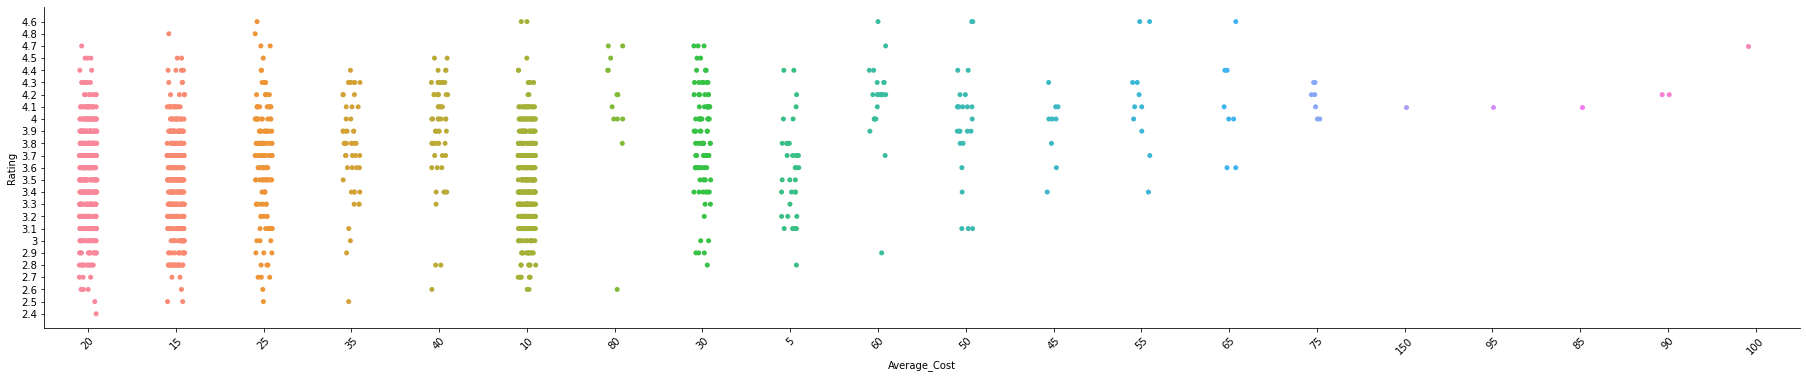

In [108]:
df3 = sns.catplot(x='Average_Cost', y= 'Rating', data =df5, aspect=5)
df3.set_xticklabels(rotation=45)

In [22]:
!pip install geopandas
!pip install pyshp
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [23]:
from google.colab import files
uploaded = files.upload()

Saving 2010_Census_Tracts.cpg to 2010_Census_Tracts (1).cpg
Saving 2010_Census_Tracts.dbf to 2010_Census_Tracts (1).dbf
Saving 2010_Census_Tracts.prj to 2010_Census_Tracts (1).prj
Saving 2010_Census_Tracts.shp to 2010_Census_Tracts (1).shp
Saving 2010_Census_Tracts.shx to 2010_Census_Tracts (1).shx


In [24]:
map = gpd.read_file('2010_Census_Tracts.shp')

In [25]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geometry[:3]

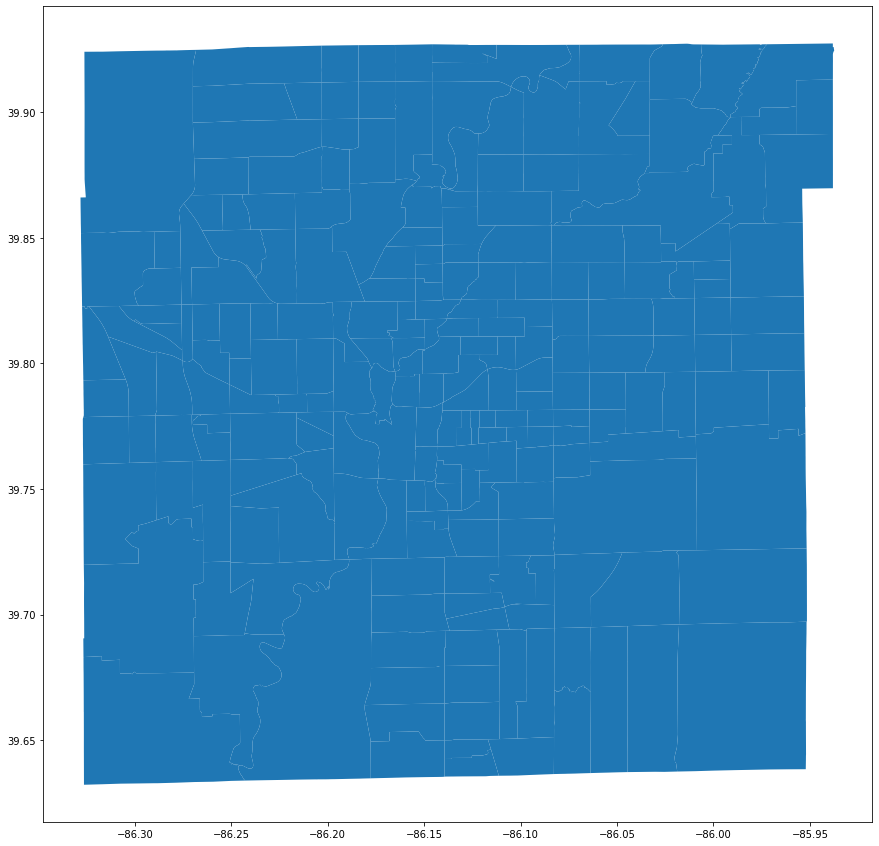

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax)

In [ ]:
df = df[~(df.Average_Cost=='1,20')]
df = df[~(df.Average_Cost=='1,00')]
pd.to_numeric(df.Average_Cost)

In [27]:
geo_df = gpd.GeoDataFrame(df, geometry=geometry)
crs = {'init':'epsg:4326'}
geo_df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,geometry
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20,50,3.5,12,4,30 minutes,POINT (-85.83737 39.26261)
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10,50,3.5,11,4,30 minutes,POINT (-85.74058 39.77593)
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15,50,3.6,99,30,65 minutes,POINT (-85.12378 39.25344)
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25,99,3.7,176,95,30 minutes,POINT (-85.33205 39.02984)
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20,99,3.2,521,235,65 minutes,POINT (-85.51741 39.88228)


In [28]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geometry[:3]

# Distribution of Resturants Over Latitude and Longitude

Using GIS, this graph shows the clustering of resturants in the Indianapolis area superimposed over a map of the area. The resturant distribution looks to be quite uniform, which is an important feature to look for when scheduling delivery rides. Using this information we can create different zones that can categorize faster delivery times for certain customers depending on location. Food "deserts" would make it more troublesome to deliver meals. 

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


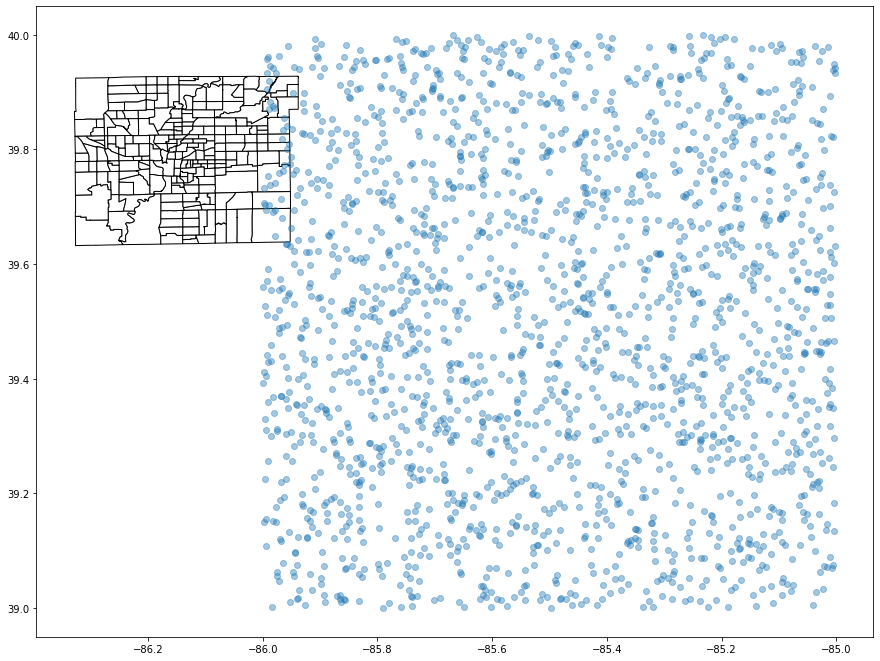

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')
map.plot(color='white', ax=ax, edgecolor='black')
geo_df.plot(alpha=0.4, ax=ax)
geo_df[geo_df['Rating'] == 3.5].plot(alpha=0.4, ax=ax, color = 'green')
plt.show()

# Resturant Location and Distribution of Average Cost

We can see the location of more value- driven resturants. Since we are catering to young adults, this map can show us the location of lower-priced resturants. We can take this into account when creating routes as these resturants will most likely have higher demands. If more higher-demand resturants are located in the same area, we can find ways to optimize the pick up of orders and have faster delivery times.

In [ ]:
df8 = sns.catplot(x='Longitude', y= 'Latitude', hue = 'Average_Cost', data =df2)
df8